In [1]:
from emnist import list_datasets, extract_training_samples
from matplotlib import pyplot as plt
import cv2
import numpy as np
from pathlib import Path

In [2]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [54]:
def add_alpha(image):
    # Create a new RGBA image
    rgba = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)
    rgba[:,:,0] = image         # R channel (grayscale value)
    rgba[:,:,1] = image         # G channel (grayscale value)
    rgba[:,:,2] = image         # B channel (grayscale value)
    rgba[:,:,3] = 255 - image   # A channel (inverse of grayscale - white becomes transparent)

    return rgba

def crop_to_content_old(image):
    ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    cntr = contours[0]
    x,y,w,h = cv2.boundingRect(cntr)

    return image[y:y+h, x:x+w]


def crop_to_content(image):
    ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)
    content = np.argwhere(thresh == 255)
    x_min, x_max = np.min(content[:, 0]), np.max(content[:, 0])
    y_min, y_max = np.min(content[:, 1]), np.max(content[:, 1])

    return image[x_min:x_max, y_min:y_max]


In [55]:
letters_imgs, letters_labels = extract_training_samples('byclass')

In [56]:
min(letters_labels), max(letters_labels)

(np.uint8(0), np.uint8(61))

In [57]:
label = 26
unit = 40

In [58]:
q = letters_labels[letters_labels == label]

In [59]:
letters_labels[letters_labels == label][unit]

np.uint8(26)

In [60]:
image = letters_imgs[letters_labels == label][unit]

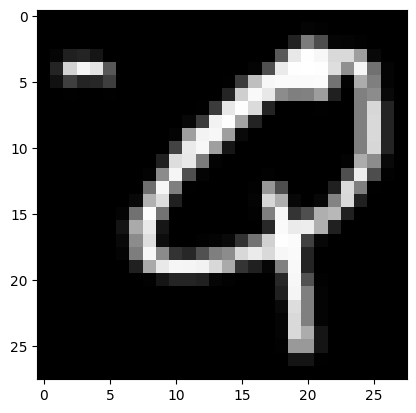

In [63]:
plt.imshow(image, cmap='gray')

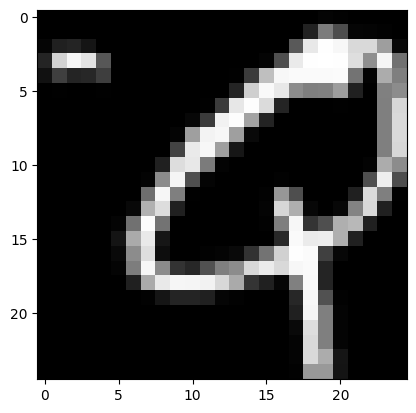

In [64]:
plt.imshow(crop_to_content(image), cmap="gray")

In [250]:
hw_dataset_path = Path("../data/handwritten_dataset_emnist/")
counter = {}

for image, label in zip(letters_imgs, letters_labels):
    # check label is a number or uppercase letter
    if label in range(10, 36):
        counter[label] = counter.get(label, 0) + 1

        # crop image to content
        image = crop_to_content(image)

        # invert colors
        image = 255 - image

        # add alpha channel
        image = add_alpha(image)

        # save image
        folder_name = chr(label+55) if label >= 10 else str(label)
        output_path = hw_dataset_path / folder_name
        output_path.mkdir(parents=True, exist_ok=True)
        res = cv2.imwrite(output_path / f"{counter[label]}.png", image)

        break